# Data Cleaning

This notebook is for data cleaning purposes.

**Other useful links:**
- <a href="https://github.com/schmitzmelissa/DSCT-Capstone01/blob/master/InitialDataExploration.ipynb">Initial Data Exploration</a>
- <a href="https://github.com/schmitzmelissa/DSCT-Capstone01">Full Github Repository</a>
- <a href="https://www.kaggle.com/footprintnetwork/ecological-footprint">Kaggle Dataset</a>
- <a href="https://www.footprintnetwork.org/">Data Source Website</a>
- <a href="https://www.footprintnetwork.org/resources/glossary/">Glossary of Relevant Terms</a>

## Imports and Creation of DataFrame from CSV

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allows better display of DataFrames
from IPython.display import display

# Create DataFrame from CSV file
df = pd.read_csv('countries.csv')

In [41]:
pd.set_option('display.max_colwidth',1000)

# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [42]:
df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5


# Removing Missing Values

### Removal of rows with NaN in GDP per Capita
The data is from 2016 and I could not find another data source for GDP from 2016 to supplement the missing values. Every nation has a GDP, but if I have no other measure of financial prosperousness for a certain country, I cannot make predictions based on finances for that country.

This decision __removed 15 countries (8% of total data)__ from my dataset, as shown below.

Once the model is created, other parameters for these 15 countries could potentially be used to make predictions about these missing values, however (i.e, perhaps GDP per Capita could be predicted from other values with the model).

In [43]:
# Create a DF that does not include countries with empty GDP values
df_noGDP = df[pd.isnull(df['GDP per Capita']) == False]
df_noGDP

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5
10,Azerbaijan,Middle East/Central Asia,9.310,0.750000,"$7,106.04",0.66,0.22,0.11,1.25,0.01,...,0.46,0.20,0.11,0.02,0.06,0.85,-1.46,1.33,2.720000,6


### Removal of rows that only have aggregate values for Total Footprint and Total Biocapacity
There are several countries that are missing all the footprint data and resource data except for the totals for footprints and biocapacity. If the model is to use aspects of the footprint (e.g., carbon emissions) or the biocapacity (e.g., forest land), then rows that contain NaN for that data should be omitted in order to create the model.

From manual inspection of the DataFrame, any column that was missing any one of the component footprints or resources was missing all of them. So this can be executed by removing rows via any of the missing columns.

This deicison __removed 10 countries (another 5% for 13% total reduction)__ from the dataset, as shown below.

After the model is created, the rows containing only total footprint and total biocapacity (the sum rather than the parts) may be added in to create predictions for those countries.

In [44]:
# Create a DF that does not include countries with empty values for component footprints or resources
df_noFandR = df_noGDP[pd.isnull(df_noGDP['Cropland']) == False]

df_noFandR

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5
10,Azerbaijan,Middle East/Central Asia,9.310,0.750000,"$7,106.04",0.66,0.22,0.11,1.25,0.01,...,0.46,0.20,0.11,0.02,0.06,0.85,-1.46,1.33,2.720000,6
11,Bahamas,Latin America,0.370,0.780000,"$22,647.30",0.97,1.05,0.19,4.46,0.14,...,0.05,0.00,1.18,8.27,0.04,9.55,2.71,3.95,0.720000,3L


In [45]:
# Save DF with NaN values removed to a separate csv file
# df_noFandR.to_csv('countries_cleanedNaNs.csv')

In [46]:
# Save original DataFrame
df_original = df

# Rename current working DataFrame
df = df_noFandR

## Removal of NaN Values Complete
At this point there are no more NaN values, creating a dataset with 87% of the original data left intact.

However, one dubious row is Data Quality, for which I have yet to find a proper explanation for (see <a href="https://www.kaggle.com/footprintnetwork/ecological-footprint/discussion/74703">this Kaggle discussion</a> for updates). This lack of data might impact the integrity of the final model if results cannot be weighted by data quality.

# Cleaning non-NaN Values

### Removing Unnecessary Symbols (<code>$</code> and <code>,</code>) and Correcting Data Type of GDP per Capita

In [47]:
# Remove $ and , from GDP per Capita column
df['GDP per Capita'] = df['GDP per Capita'].str.replace('$', '')
df['GDP per Capita'] = df['GDP per Capita'].str.replace(',', '')

# Convert to float
df['GDP per Capita'] = df['GDP per Capita'].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [48]:
# Display modified DataFrame with float values
df.head(5)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
5,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6


In [49]:
# Print head to see stripped values and data type
print(df['GDP per Capita'].head())

0      614.66
1     4534.37
2     5430.57
3     4665.91
5    13540.00
Name: GDP per Capita, dtype: float64


### Simplify region names

In [50]:
# First find all the options
df['Region'].value_counts()

Africa                      48
Latin America               29
Asia-Pacific                27
European Union              24
Middle East/Central Asia    22
Northern/Eastern Europe     11
North America                2
Name: Region, dtype: int64

*_A work in progress, as it is not a necessity for this project._

### Finding Outliers: GDP per Capita

In [51]:
type(df['Cropland Footprint'][0])

numpy.float64

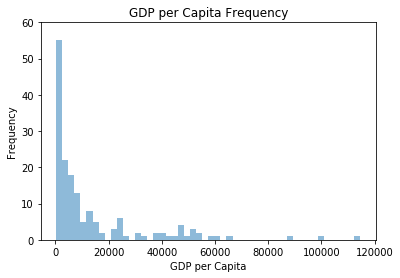

In [52]:
plt.hist(df['GDP per Capita'], bins=50, alpha=0.5)
plt.title('GDP per Capita Frequency')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

In [53]:
df['GDP per Capita'].max()

114665.0

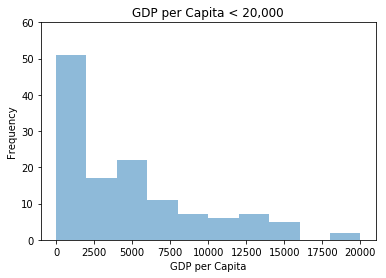

In [54]:
# Histogram for GDP per Capita < 20,000
plt.hist(df['GDP per Capita'], range=[0,20000], bins=10, alpha=0.5)
plt.title('GDP per Capita < 20,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

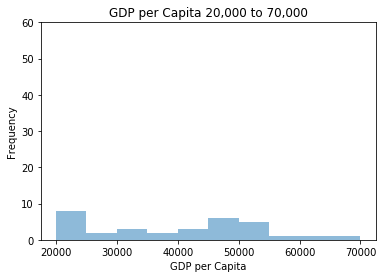

In [55]:
# Histogram for GDP per Capita between 20,000 and 70,000
plt.hist(df['GDP per Capita'], range=[20000,70000], bins=10, alpha=0.5)
plt.title('GDP per Capita 20,000 to 70,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

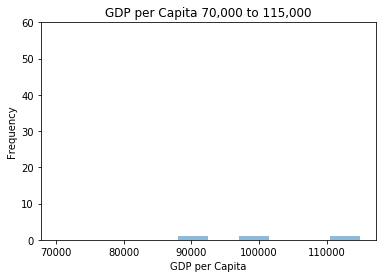

In [56]:
# Histogram for GDP per Capita between 70,000 and 115,000
plt.hist(df['GDP per Capita'], range=[70000,115000], bins=10, alpha=0.5)
plt.title('GDP per Capita 70,000 to 115,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

The 3 outliers at the upper end have over $70,000 GDP per capita.
Now I just need to identify which countries these belong to.

In [57]:
# Filtering large outliers into a sub-DataFrame
df[df['GDP per Capita'] > 70000]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
102,Luxembourg,European Union,0.52,0.89,114665.0,1.10,0.76,1.03,12.65,0.13,...,0.57,0.08,0.89,0.00,0.14,1.68,-14.14,9.14,9.44,5
138,Qatar,Middle East/Central Asia,2.05,0.85,99431.5,0.57,0.27,0.15,9.57,0.19,...,0.01,0.00,0.00,1.17,0.06,1.24,-9.56,6.24,8.72,3L
163,Switzerland,Northern/Eastern Europe,8.00,0.93,88506.2,0.75,0.22,0.38,4.26,0.07,...,0.32,0.12,0.74,0.01,0.12,1.30,-4.48,3.34,4.44,6


*_I would have liked to filter out just the <code>'Country'</code> and <code>'GDP per Capita'</code> columns to make the goal of the output DataFrame more obvious to the reader of this notebook (the extra columns are unnecessary). Perhaps, ideally, it would output those country names and/or index numbers to a list._

In [58]:
GDP_out_bulk = df[df['GDP per Capita'] < 20000]
print('Bulk of data: ' + str(len(GDP_out_bulk)))

GDP_out_major = df[df['GDP per Capita'] > 70000]

#GDP_out_mid = df[df['GDP per Capita'] > 20000 and df['GDP per Capita'] < 70000]
#print('Mid range: ' + str(len(GDP_out_mid)))
# Need to research how to use boolean statements for this when connected to internet
print('Mid range: ' + str(len(df) - len(GDP_out_major) - len(GDP_out_bulk)))

print('Major outliers: ' + str(len(GDP_out_major)))

Bulk of data: 128
Mid range: 32
Major outliers: 3


#### Summary of GDP Sub-groups
- **Bulk of data:** 0 to 20,000 (128 countries, 78.5%)
- **Mid range:** 20,000 to 70,000 (32 countries, 19.6%)
- **Major outliers:** >80,000 (3 countries, 1.8%)

__Rationale:__ Countries with high GDP per capita are financially properous. It's likely that they have fewer poor people living in the country, so financial resources may be directed more toward progress in sustainability than, say, social programs. This might also suggest unusually higher levels of biocapity compared to countries with lower GDP per capita.

_Maybe should look at the relationship between GDP and population as well as these outliers with relation to their total biocapacity_

### Finding Outliers: Population

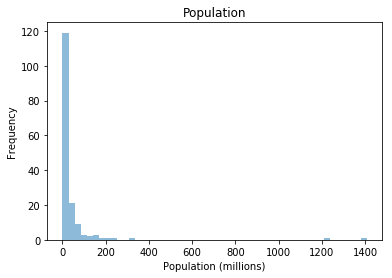

In [59]:
plt.hist(df['Population (millions)'], bins=50, alpha=0.5)
plt.title('Population')
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')

plt.show()

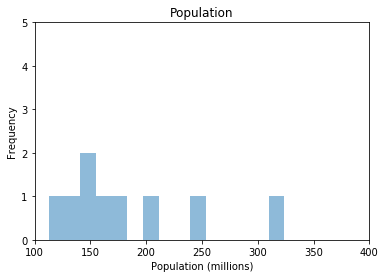

In [60]:
plt.hist(df['Population (millions)'], bins=100, alpha=0.5)
plt.title('Population')
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.xlim(100,400)
plt.ylim(0,5)

plt.show()

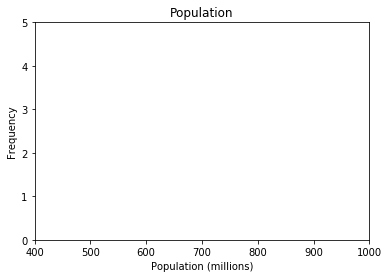

In [67]:
plt.hist(df['Population (millions)'], bins=100, alpha=0.5)
plt.title('Population')
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.xlim(400,1000)
plt.ylim(0,5)

plt.show()

No data from 400 to 1000.

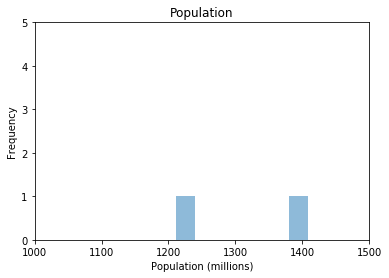

In [61]:
plt.hist(df['Population (millions)'], bins=50, alpha=0.5)
plt.title('Population')
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.xlim(1000,1500)
plt.ylim(0,5)

plt.show()

In [62]:
# Filtering large outliers into a sub-DataFrame
df[df['Population (millions)'] > 1000]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
37,China,Asia-Pacific,1408.04,0.72,5560.94,0.55,0.13,0.19,2.32,0.08,...,0.46,0.1,0.22,0.04,0.12,0.94,-2.44,1.95,3.59,6
79,India,Asia-Pacific,1236.69,0.60,1513.85,0.34,0.01,0.14,0.61,0.02,...,0.35,0.0,0.02,0.03,0.05,0.45,-0.71,0.67,2.55,6


#### Summary of Population Sub-groups
- **Bulk of data:** 0 to 400 (161 countries, 98.8%)
- **No data:** 400 to 1,200 (0 countries, 0%)
- **Major outliers:** >1,200 (2 countries, 1.2%)

__Rationale:__ Unusually dense populations might be more prone to poverty if there's "not enough to go around". This may deflect resources away from environmental issues. In the case of China, massive factories and pollution is a known issue.

### Finding Outliers: Total Biocapacity

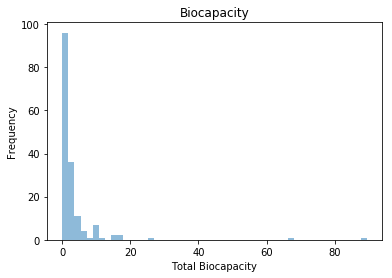

In [63]:
plt.hist(df['Total Biocapacity'], bins=50, alpha=0.5)
plt.title('Biocapacity')
plt.xlabel('Total Biocapacity')
plt.ylabel('Frequency')

plt.show()

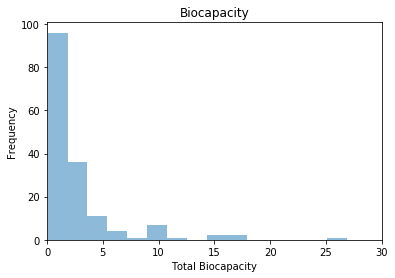

In [69]:
plt.hist(df['Total Biocapacity'], bins=50, alpha=0.5)
plt.title('Biocapacity')
plt.xlabel('Total Biocapacity')
plt.ylabel('Frequency')
plt.xlim(0,30)

plt.show()

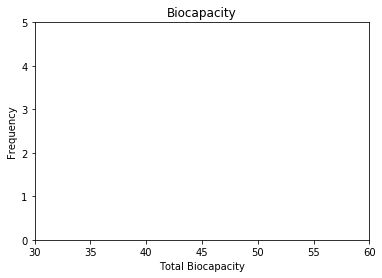

In [70]:
plt.hist(df['Total Biocapacity'], bins=50, alpha=0.5)
plt.title('Biocapacity')
plt.xlabel('Total Biocapacity')
plt.ylabel('Frequency')
plt.xlim(30,60)
plt.ylim(0,5)

plt.show()

No data between 30 and 60.

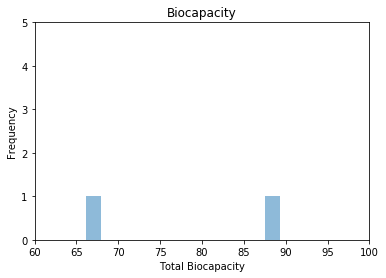

In [65]:
plt.hist(df['Total Biocapacity'], bins=50, alpha=0.5)
plt.title('Biocapacity')
plt.xlabel('Total Biocapacity')
plt.ylabel('Frequency')
plt.xlim(60,100)
plt.ylim(0,5)

plt.show()

In [66]:
# Filtering large outliers into a sub-DataFrame
df[df['Total Biocapacity'] > 60]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
75,Guyana,Latin America,0.80,0.63,3269.46,0.70,0.22,0.77,1.25,0.06,...,0.69,1.51,59.19,5.12,0.06,66.58,63.51,1.77,0.05,5
160,Suriname,Latin America,0.54,0.71,8190.70,0.43,0.06,0.52,3.01,0.14,...,0.30,0.03,81.52,7.39,0.09,89.33,85.08,2.46,0.05,3L


#### Summary of Total Biocapacity Sub-groups
- **Bulk of data:** 0 to 30 (161 countries, 98.8%)
- **Major outliers:** >60 (2 countries, 1.2%)

*Note: 1 country is ~27 and is by itself but not significantly far away from the bulk of data*

__Rationale:__ Countries with extremely high biocapacity are more likely to be undeveloped, so the predictions they provide may be irrelevant for more developed countries. In this case, I can see that Suriname actually has a higher carbon footprint than China, so high biocapacity for an undeveloped country might also mean that a country has fewer energy-efficient or non-petroleum-reliant cars and factories.

### Finding Outliers: Biocapacity Deficit or Reserve

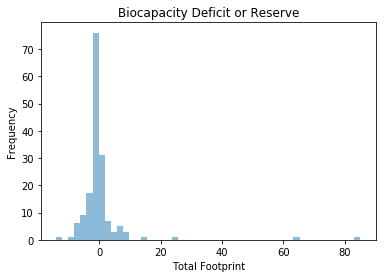

In [72]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')

plt.show()

It is noteworthy that there are some negative values, here. They should be treated differently from the positive values. Recall that the biocapacity deficit or reserve is defined as the difference between total biocapacity and the total ecological footprint.

Biocapacity - Footprint = Reserve

- Positive values indicate an excess of resources
- Negative values indicate a deficit of resources

In other words, a negative value indicates that a country is using more resources than it creates and/or cleans up.

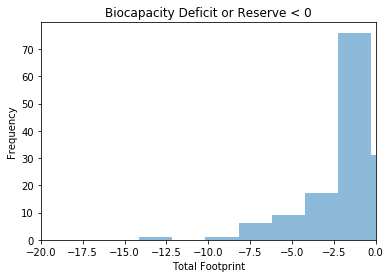

In [73]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve < 0')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')
plt.xlim(-20,0)

plt.show()

It appears that a major chunk of the world is using up more resources than it creates. Let's make sure that the largest spike is indeed below 0.

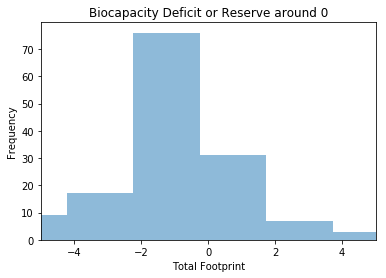

In [81]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve around 0')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')
plt.xlim(-5,5)

plt.show()

Confirmed, the bulk of countries are shown here with a deficit.

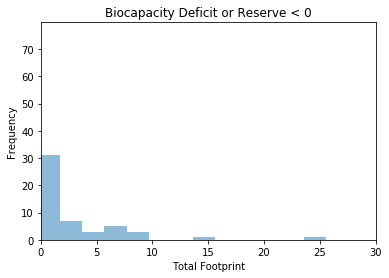

In [75]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve < 0')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')
plt.xlim(0,30)

plt.show()

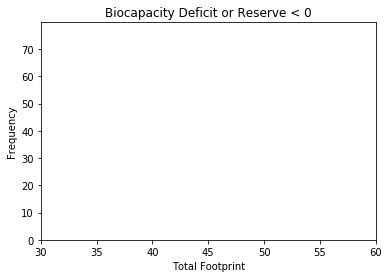

In [77]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve < 0')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')
plt.xlim(30,60)

plt.show()

No data 30 to 60.

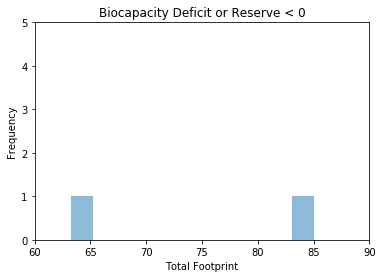

In [79]:
plt.hist(df['Biocapacity Deficit or Reserve'], bins=50, alpha=0.5)
plt.title('Biocapacity Deficit or Reserve < 0')
plt.xlabel('Total Footprint')
plt.ylabel('Frequency')
plt.xlim(60,90)
plt.ylim(0,5)

plt.show()

In [83]:
defres_out_bulk = df[df['Biocapacity Deficit or Reserve'] < 0]
print('Countries with deficit (bulk of data): ' + str(len(defres_out_bulk)))

defres_out_mid = df[df['Biocapacity Deficit or Reserve'] < 0]
print('Countries with reserve (mid-range): ' + str(len(df)-len(defres_out_bulk)-2))

Countries with deficit (bulk of data): 116
Countries with reserve (mid-range): 45


In [84]:
# Filtering large outliers into a sub-DataFrame
df[df['Biocapacity Deficit or Reserve'] > 60]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
75,Guyana,Latin America,0.80,0.63,3269.46,0.70,0.22,0.77,1.25,0.06,...,0.69,1.51,59.19,5.12,0.06,66.58,63.51,1.77,0.05,5
160,Suriname,Latin America,0.54,0.71,8190.70,0.43,0.06,0.52,3.01,0.14,...,0.30,0.03,81.52,7.39,0.09,89.33,85.08,2.46,0.05,3L


#### Summary Deficit or Reserve Sub-groups
- **Countries with deficit (bulk of data:** <0 (116 countries, 71.2%)
- **Countries with small reserve (mid-range):** 0 to 30 (45 countries, 27.6%)
- **Major outliers:** >60 (2 countries, 1.2%)

*Note: The two outliers here are the same as for Total Biocapacity because the "deficit or reserve" metric includes the measure of biocapacity. There are no negative values in Total Biocapacity because you can't have, for example, a negative amount of forest land. The "deficit or reserve" metric takes into account the ecological footprint, as well.* So it would be interesting to see how Total Biocapacity correlates with Deficit or Reserve.

## Examining Relationships for Outliers (?)
should rename this tbh

### Total Biocapacity vs. Deficit/Reserve

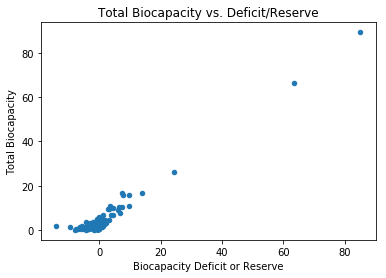

In [87]:
df.plot.scatter(x='Biocapacity Deficit or Reserve',
                y='Total Biocapacity')
plt.title('Total Biocapacity vs. Deficit/Reserve')

plt.show()

### Population vs. Carbon Footprint

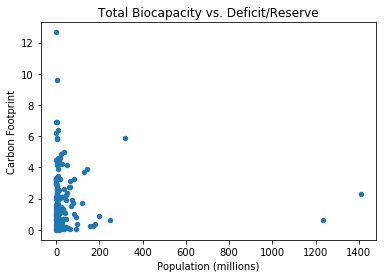

In [92]:
df.plot.scatter(x='Population (millions)',
                y='Carbon Footprint')
plt.title('Total Biocapacity vs. Deficit/Reserve')

plt.show()

Interestingly enough, more populus areas do not actually have a higher carbon footprint. In fact, the most populus areas apparently have pretty average footprints!

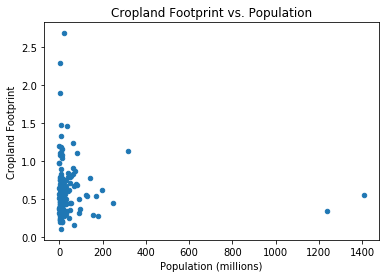

In [94]:
df.plot.scatter(x='Population (millions)',
                y='Cropland Footprint')
plt.title('Cropland Footprint vs. Population')

plt.show()

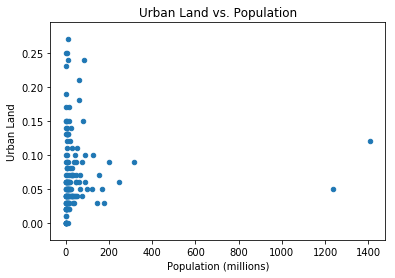

In [95]:
df.plot.scatter(x='Population (millions)',
                y='Urban Land')
plt.title('Urban Land vs. Population')

plt.show()

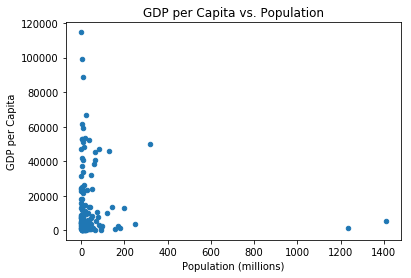

In [96]:
df.plot.scatter(x='Population (millions)',
                y='GDP per Capita')
plt.title('GDP per Capita vs. Population')

plt.show()

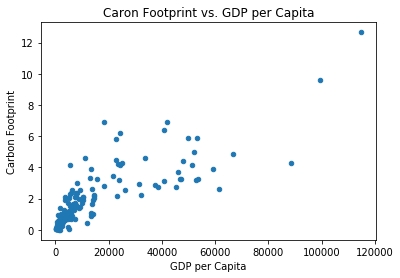

In [97]:
df.plot.scatter(x='GDP per Capita',
                y='Carbon Footprint')
plt.title('Caron Footprint vs. GDP per Capita')

plt.show()

It appears that GDP per Capita is somewhat positively correlated to Carbon Footprint.

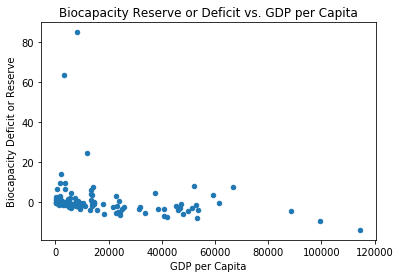

In [100]:
df.plot.scatter(x='GDP per Capita',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Reserve or Deficit vs. GDP per Capita')

plt.show()

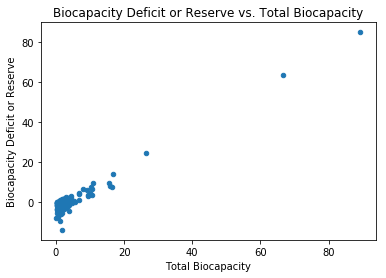

In [101]:
df.plot.scatter(x='Total Biocapacity',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. Total Biocapacity')

plt.show()

Correlated, as expected.

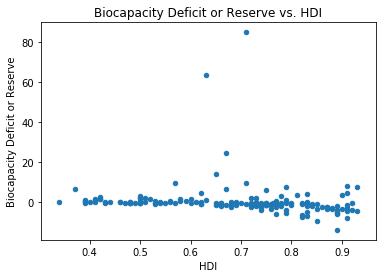

In [102]:
df.plot.scatter(x='HDI',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. HDI')

plt.show()

No correlation at all! (aside from a few outliers)

Questions
- Of countries that have a deficit, which ecological footprint is more closely tied to the problem? Greenhouse gas emissions?